In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

In [22]:
def _importData():
    global x, y
    ds = pd.read_csv('diabetes_pp.csv')
    y = ds['Outcome']
    x = ds.drop('Outcome', axis = 1)

In [23]:
_importData()

In [24]:
def _split(size):
    global x_train, x_test, y_train, y_test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=size)

In [25]:
_split(0.2)
y_train

488    0
454    0
310    0
439    0
111    1
      ..
78     1
128    1
258    0
367    0
317    1
Name: Outcome, Length: 614, dtype: int64

In [26]:
def _createModel():
    global dt_model
    dt_model = DecisionTreeClassifier(criterion='entropy')


In [27]:
_createModel()

In [28]:
def _fit():
    dt_model.fit(x_train, y_train)

In [29]:
_fit()

In [30]:
def _predict():
    global y_pred
    y_pred = dt_model.predict(x_test)

In [31]:
_predict()
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [32]:
def _report():
    report = classification_report(y_test, y_pred)
    print(report)

In [33]:
_report()

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       101
           1       0.56      0.58      0.57        53

    accuracy                           0.70       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154



In [34]:
def _conf_matrix():
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    print(cm)

[[77 24]
 [22 31]]


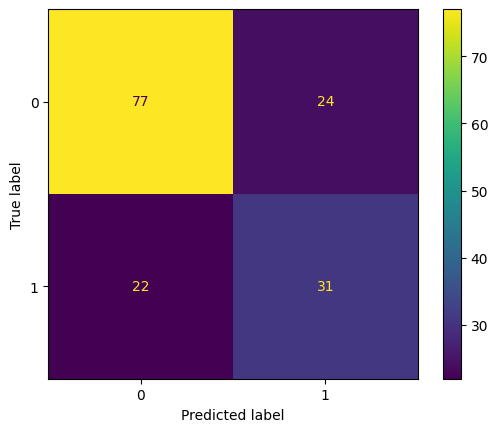

In [35]:
_conf_matrix()

In [36]:
def _drawTree():
    class_names = y.astype(str).unique().tolist()

    dot_file = export_graphviz(dt_model, out_file='diabetes.dot', 
                           feature_names=x.columns,
                           class_names=class_names,  
                           filled=True)


In [37]:
_drawTree()